In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.dataset import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
path = "/home/mahathi/Desktop/Workspace/fast_ai/data/imagenet/"

In [5]:
sz=224
bs=28

In [6]:
jpg_img = plt.imread(f'/home/mahathi/Desktop/Workspace/fast_ai/data/imagenet/train/cats/n02124075_5834.JPEG')

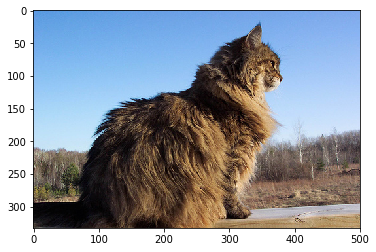

In [7]:
plt.imshow(jpg_img)

In [8]:
jpg_img.shape

(333, 500, 3)

In [9]:
arch=resnet34

In [10]:
resized_data = ImageClassifierData.from_paths(path, tfms=tfms_from_model(arch, sz))

In [11]:
learn = ConvLearner.pretrained(arch, resized_data, precompute=True)

In [12]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 73%|███████▎  | 30/41 [00:04<00:01,  6.78it/s, loss=6.68] 


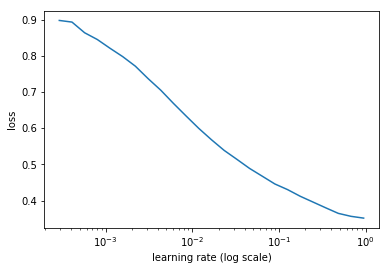

In [13]:
learn.sched.plot()

In [14]:
learn.fit(0.1, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch:   0, train_loss: 0.035820, val_loss: 0.000035, accuracy: 1.000000
epoch:   1, train_loss: 0.022641, val_loss: 0.009876, accuracy: 0.992188
epoch:   2, train_loss: 0.019208, val_loss: 0.000025, accuracy: 1.000000



In [15]:
resized_data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
tfms_model = tfms_from_model(arch, sz,aug_tfms=transforms_side_on, max_zoom=1.1)

In [17]:
learn = ConvLearner.pretrained(arch, ImageClassifierData.from_paths(path, bs=bs,tfms=tfms_model), precompute=True)

In [18]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 90%|█████████ | 84/93 [00:00<00:00, 156.53it/s, loss=2.72] 


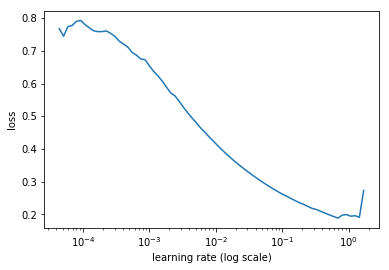

In [19]:
learn.sched.plot()

In [20]:
learn.fit(0.1,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch:   0, train_loss: 0.098529, val_loss: 0.053296, accuracy: 0.991071
epoch:   1, train_loss: 0.035719, val_loss: 0.001669, accuracy: 1.000000
epoch:   2, train_loss: 0.031778, val_loss: 0.000017, accuracy: 1.000000



In [21]:
learn.precompute=False

In [22]:
learn.fit(0.1,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch:   0, train_loss: 0.024978, val_loss: 0.007112, accuracy: 0.991071
epoch:   1, train_loss: 0.029211, val_loss: 0.000207, accuracy: 1.000000
epoch:   2, train_loss: 0.023535, val_loss: 0.000006, accuracy: 1.000000



In [23]:
learn.unfreeze()

In [24]:
lr = np.array([1e-3,1e-2,1e-1])

In [25]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.318976, val_loss: 0.083956, accuracy: 0.964286
epoch:   1, train_loss: 0.219336, val_loss: 0.066522, accuracy: 0.964286
epoch:   2, train_loss: 0.102560, val_loss: 0.024409, accuracy: 0.991071
epoch:   3, train_loss: 0.117328, val_loss: 0.008949, accuracy: 1.000000
epoch:   4, train_loss: 0.069466, val_loss: 0.016560, accuracy: 0.991071
epoch:   5, train_loss: 0.049787, val_loss: 0.011809, accuracy: 0.991071
epoch:   6, train_loss: 0.044422, val_loss: 0.012753, accuracy: 0.991071



In [26]:
log_predicts, y = learn.TTA()

In [32]:
np.exp(log_predicts).shape

(5, 100, 2)

In [35]:
probs = np.mean(np.exp(log_predicts),0)

In [39]:
probs.shape, y.shape

((100, 2), (100,))

In [37]:
accuracy(probs, y)

1.0